In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import density_plot
from config import plot_path, parameter, data_path
import runner

In [2]:
Omega_a_h_sq_harm, theta_i_s_harm, f_a_s_harm = runner.load_data(data_path + "/harmonic.npz")
Omega_a_h_sq, theta_i_s, f_a_s = runner.load_data(data_path + "/cosine.npz")

## Polynomial

In [3]:
# def fit_fn(f_a, A, q): return np.log10(A) + q*np.log10(f_a)
def fit_fn(log_f_a, log_A, q, B_over_A, p_minus_q): 
    return log_A + q * log_f_a + np.log(1 + B_over_A * (10**log_f_a)**p_minus_q) 
theta_i_index = 50
Omega_unit = 1e-15
Omega = Omega_a_h_sq_harm[theta_i_index, :] / Omega_unit
f_a_unit = 1e14
f_a = f_a_s / f_a_unit
params, cov = opt.curve_fit(fit_fn, np.log10(f_a), np.log10(Omega), p0=(-5, 1, 1, 0), maxfev=5000)
err = np.sqrt(np.diag(cov))
log_A, q, B_over_A, p_minus_q = params
print(params, "+/-\n", err)
A = 10 ** log_A
B = B_over_A * A
p = p_minus_q + q
print("A =", A)
print("q =", q, "vs 7/6 =", 7/6)
print("B =", B)
print("p =", p, "vs 3/2 =", 3/2)

[  6.55275455e+00   1.17008616e+00   1.05246090e-18   1.26023018e+00] +/-
 [  1.82554388e-02   1.94924977e-03   6.36492544e-18   1.88962029e-01]
A = 3570709.74899
q = 1.17008615508 vs 7/6 = 1.1666666666666667
B = 3.75803238462e-12
p = 2.43031633091 vs 3/2 = 1.5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


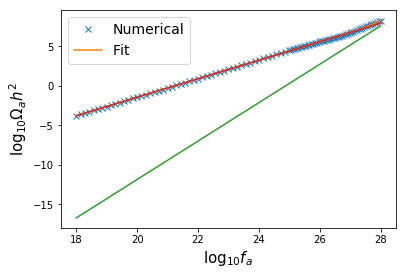

In [4]:
plt.plot(np.log10(f_a) + np.log10(f_a_unit), np.log10(Omega) + np.log10(Omega_unit), "x", label="Numerical")
plt.plot(np.log10(f_a) + np.log10(f_a_unit), fit_fn(np.log10(f_a), *params) + np.log10(Omega_unit), label="Fit")
plt.plot(np.log10(f_a) + np.log10(f_a_unit), np.log10(Omega_unit) + np.log10(B) +  p * np.log10(f_a))
plt.plot(np.log10(f_a) + np.log10(f_a_unit), np.log10(Omega_unit) + np.log10(A) +  q * np.log10(f_a))

plt.xlabel("$\log_{10} f_a$", fontsize=15)
plt.ylabel(r"$\log_{10} \Omega_a h^2$", fontsize=15)
plt.legend(fontsize=14)

In [6]:
F_A, THETA_I = np.meshgrid(f_a_s, theta_i_s)
Omega_a_h_sq_harm_fit = (
    10**(fit_fn(np.log10(F_A) - np.log10(f_a_unit), *params) + np.log10(Omega_unit))
    * THETA_I**2 / theta_i_s[theta_i_index]**2
)

Text(0,0.5,'relative error')

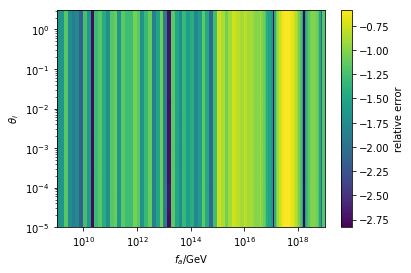

In [7]:
rel_err = np.abs(Omega_a_h_sq_harm - Omega_a_h_sq_harm_fit) / Omega_a_h_sq_harm
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(rel_err))
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("relative error")

## Changing Power Law

1.1666666666666667 1.5
1.19399579844 0.786918450286
2.1708640827e+17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


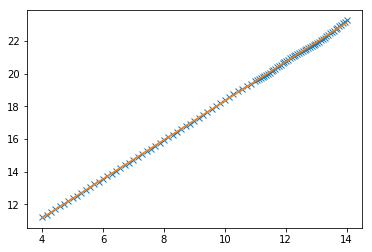

[  2.48402636e+06   1.19399580e+00   9.39577323e-01   2.17086408e+17
   2.27238617e+02] 
 [ inf  inf  inf  inf  inf]


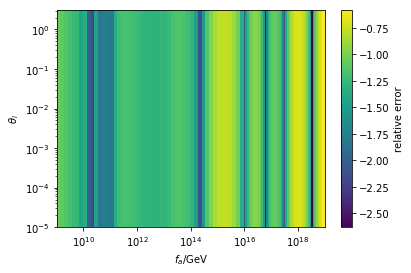

In [35]:
# def fit_fn(f_a, A, S, C, f_star, q):
def fit_fn(log_f_a, A, S, C, f_star, q):

    # P = S * (1 + C * (f_a / f_star)**q) / (1 + (f_a / f_star)**q)
    P = S * (1 + C * (10**log_f_a / f_star)**q) / (1 + (10**log_f_a / f_star)**q)
    # return np.log10(A) + P * np.log10(f_a)
    return np.log10(A) + P * log_f_a

# params, cov = opt.curve_fit(fit_fn, f_a, np.log10(Omega), p0=(1e-4, 7/6, 1, 1e12, 1e-3))
params, cov = opt.curve_fit(fit_fn, np.log10(f_a), np.log10(Omega), p0=(1e10, 7/6, 1, 1e12, 1e-3))

A, S, C, f_star, q = tuple(params)
pow1 = S
pow2 = C / S

print(7/6, 3/2)
print(pow1, pow2)
print(f_star)

err = np.diag(np.sqrt(cov))
plt.plot(np.log10(f_a), np.log10(Omega), "x")
plt.plot(np.log10(f_a), fit_fn(np.log10(f_a), *params))
plt.show()


Omega_a_h_sq_harm_fit = (
    Omega_unit * 10**fit_fn(np.log10(F_A) - np.log10(f_a_unit), *params) 
    * THETA_I**2 / theta_i_s[theta_i_index]**2
)

rel_err = np.abs(Omega_a_h_sq_harm - Omega_a_h_sq_harm_fit) / Omega_a_h_sq_harm

ig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(rel_err))
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("relative error")


# plt.xlim((1e12, np.max(f_a)))
print(params, "\n", err)

In [36]:
from ipywidgets import interact
import ipywidgets 

In [37]:
N = 20
@interact
def fn(S=(0.2, 2.), C=(0., 2.), f_s=(0., 10.), q=(0., 25.)):
    f = np.linspace(0, 10, 300)
    plt.plot(f, S * (1 + C / S * (f / f_s)**q) / (1 + (f / f_s)**q))

interactive(children=(FloatSlider(value=1.1, description='S', max=2.0, min=0.2), FloatSlider(value=1.0, description='C', max=2.0), FloatSlider(value=5.0, description='f_s', max=10.0), FloatSlider(value=12.5, description='q', max=25.0), Output()), _dom_classes=('widget-interact',))